# Heading 
Examining datasets concerning fatalties of the Northern Irish conflict and demographics?
In two parts 
#### Question 1
* Fatality count over time
Starting with set up of the jupyter notebooks 

In [2]:
### Set up project by installing necessary ??? what are these called?
!pip install numpy 
!pip install matplotlib 
!pip install pandas 
!pip install seaborn 

## Following installation, import these modules?
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
## Double check what sns.set actually does?

## Import files
niconflict = pd.read_csv("niconflict2.csv")
nidemographic = pd.read_csv("ni_demographic1.csv")
nidemographic.head()
niconflict.head()

,Serial No,Name,Year,Religion,Sex,Agency,Status,Location,Location Name,Rationale,...,IIP,RUC,MS,New Incident,Multiple Fatality,1stFatality,Punitive,Informer Status,Personal Culpability Status,Familial Link
0,3,"McCloskey, Francis",1969,Catholic,Male,lrdg,Other Non Combatant,10,East Londonderry,Public Order,...,True,False,True,True,False,NaN,NaN,NaN,NaN,NaN
1,4,"Devenny, Samuel",1969,Catholic,Male,RUC,Other Non Combatant,9,Foyle,Public Order,...,True,False,True,True,False,NaN,NaN,NaN,NaN,NaN
2,5,"Corry, Patrick",1969,Catholic,Male,RUC,Other Non Combatant,15,West Belfast,Public Order,...,True,True,True,True,False,NaN,NaN,NaN,NaN,NaN
3,6,"Gallagher, John",1969,Catholic,Male,RUC,Other Non Combatant,6,Newry & Armagh,Public Order,...,True,True,True,True,False,NaN,NaN,NaN,NaN,NaN
4,7,"McCabe, Hugh",1969,Catholic,Male,RUC,BA,15,West Belfast,Public Order,...,True,True,True,True,True,"McCabe, Hugh",NaN,NaN,NaN,NaN


In [4]:
### How do fatalitys differ year on year 
### Are the affected by the political climate 

## First - clean up NI demographic dataframe and remove columns irrelevant to this question 
nidemographic2 = nidemographic.drop(['Resident Pop.', 'P count','RC count',
                                    'Other Count','None count','Other %'], axis=1)

## Rename LGD column as Location Name for clarity 
nidemographic2 = nidemographic2.rename(columns={"LGD ":"Location Name"})

## Now merge the two dataframes - the fatalty datset and the demographic dataset 
## Merge these two dataframes across the common "location name" columns 
totaldata = pd.merge(niconflict, nidemographic2, how = "left", on="Location Name")
## NaN values are acceptable in this dataset so they will not be dropped in this case

## Rename columns to allow for easier analysis 
totaldata2 = totaldata.rename(columns={"Location Name":"Location_Name"})
totaldata2 = totaldata2.rename(columns={"Majority pop":"Majority_pop"})

## Additionally - add a new column for country data
## This allows each data point to be assigned a country - will later allow data to be split dependent on whether they occured in NI
# First define a function to apply appropriate value for each row based on location name 
def country_totaldata(totaldata):
    if (totaldata['Location_Name'] =='EU') or (totaldata['Location_Name']=='Great Britain') or (totaldata['Location_Name'] == 'Republic Of Ireland'):
        return 'Other'
    else:
        return 'Northern Ireland'
# Apply this function to the dataset 
totaldata2['Country'] = totaldata2.apply(country_totaldata, axis = 1)
# View data 
totaldata2.head()

,Serial No,Name,Year,Religion,Sex,Agency,Status,Location,Location_Name,Rationale,...,1stFatality,Punitive,Informer Status,Personal Culpability Status,Familial Link,P %,RC %,None %,Majority_pop,Country
0,3,"McCloskey, Francis",1969,Catholic,Male,lrdg,Other Non Combatant,10,East Londonderry,Public Order,...,NaN,NaN,NaN,NaN,NaN,53.3,41.7,4.4,P,Northern Ireland
1,4,"Devenny, Samuel",1969,Catholic,Male,RUC,Other Non Combatant,9,Foyle,Public Order,...,NaN,NaN,NaN,NaN,NaN,22.0,75.1,2.1,RC,Northern Ireland
2,5,"Corry, Patrick",1969,Catholic,Male,RUC,Other Non Combatant,15,West Belfast,Public Order,...,NaN,NaN,NaN,NaN,NaN,16.7,80.1,2.7,RC,Northern Ireland
3,6,"Gallagher, John",1969,Catholic,Male,RUC,Other Non Combatant,6,Newry & Armagh,Public Order,...,NaN,NaN,NaN,NaN,NaN,30.6,66.4,2.5,RC,Northern Ireland
4,7,"McCabe, Hugh",1969,Catholic,Male,RUC,BA,15,West Belfast,Public Order,...,"McCabe, Hugh",NaN,NaN,NaN,NaN,16.7,80.1,2.7,RC,Northern Ireland


In [5]:
## Want to plot fatalaties by year 
# Group data by year 
years = totaldata.groupby("Year")["Name"].count()
yearssorted = years.sort_values(ascending=False)
years

# View dataset - to see fatalty count by year 
# Notice that there is no value for the year 2004 - there were no fatalties in this year
# To accurately present the data - should add in an additional column with a 0 value count?
# First convert years - which is a series - to a dataframe in order to append a new row
years2 = years.to_frame()

# Next rename the name column to count 
years2 = years2.rename(columns={"Name":"Count"})
years2

#Create a new row(dataframe) with a count of 0 for the year 2004 
rowvalues = {'Count': 0}
newrow = pd.DataFrame(rowvalues, index=[2004])
# Append this new 'row' to the years dataframe
years2 = years2.append(newrow, ignore_index=False)
years2 = years2.sort_index()
years2

,Count
1969,17
1970,26
1971,178
1972,496
1973,262
1974,312
1975,296
1976,273
1977,113
1978,88


Text(1972.5, 0, 'Bloody Sunday, Bloody Friday')

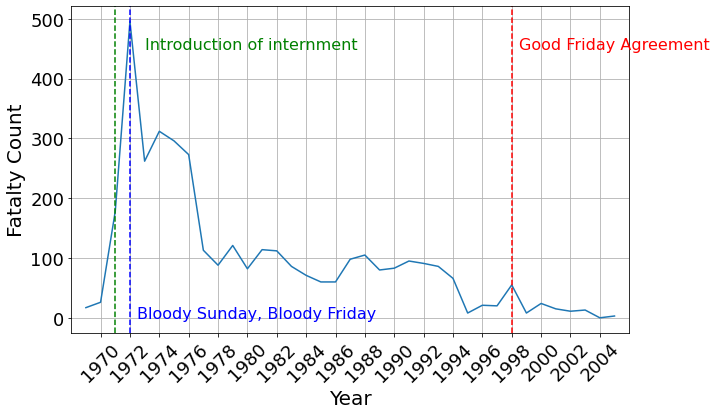

In [8]:
## Now create a plot of these values to view fatalty count by year
plt.figure(figsize=(10,6))
plt.plot(years2)
plt.title = ("Title")
plt.ylabel('Fatalty Count', fontsize = 20)
plt.xlabel('Year', fontsize = 20)
plt.xlim([1968, 2006])
plt.grid(True)


x_ticks = np.arange(1970, 2006, step=2)
plt.xticks(x_ticks)
plt.tick_params(axis="x", labelsize = 18,
                labelrotation = 45)
plt.tick_params(axis="y", labelsize = 18, direction="out")

## Plot lines 
plt.axvline(1998, color='r', linestyle='--')
plt.axvline(1972, color='b', linestyle='--')
plt.axvline(1971, color='g', linestyle='--')
plt.text(1973, 450, 'Introduction of internment', color='g', fontsize='16')
plt.text(1998.5, 450, 'Good Friday Agreement', color='r', fontsize='16')
plt.text(1972.5, 0, 'Bloody Sunday, Bloody Friday', color='b', fontsize='16')

# Question 2 

AttributeError: 'AxesSubplot' object has no attribute 'set_axis_labels'

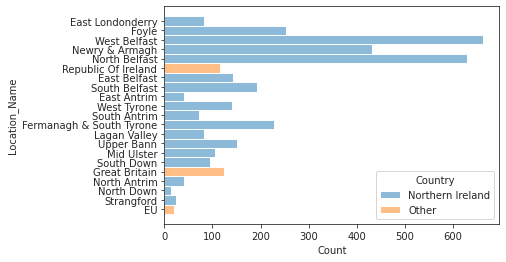

In [9]:
### Plot fatalty count by location - histogram 
with sns.axes_style(style='ticks'):
    plot3 = sns.histplot(data = totaldata2, 
                    y = "Location_Name",
                    hue = "Country")
plot3.set_axis_labels("Fatalty count", "Location Name");